##라이브러리 호출

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')


##Data 불러오기

In [245]:
train_df = pd.read_csv('/content/train_modified.csv')
test_df =  pd.read_csv('/content/test.csv')


y_train = pd.DataFrame(train_df['Diagnosis'])
X_train = train_df.drop(columns=['Diagnosis'],axis=1)
x_test = test_df

In [246]:
X_train.head()

,Sex,Race,Housing,Delay,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income
0,Male,Asian,Stable,No,5.776834,7.945197,6.538275,5.821416,5.589637,5.990781,5.843773,3.682413,3.544660,1.396333,4.292102,5.820395,6.763654,1.165049,8.730176
1,Male,Hispanic,Stable,No,7.298161,8.605159,5.386226,6.657438,6.115384,4.740278,6.033697,5.381531,2.077573,2.520095,2.950640,4.904143,3.009537,1.635291,4.675389
2,Female,Black,Unstable,No,5.478631,6.581001,7.314665,5.759076,4.096647,4.004291,7.184592,5.588698,3.076944,1.552275,5.364331,5.332242,6.689860,3.030685,0.750534
3,Female,Black,Stable,Yes,7.440324,6.482757,7.519543,5.483178,5.532212,7.980671,6.172174,6.222733,3.657648,2.413774,NaN,3.874793,6.749632,1.548987,4.812903
4,Male,White,Stable,Yes,7.655051,6.159573,7.658879,5.310127,5.067152,3.445936,8.724369,4.631259,3.452163,4.862946,3.967482,3.537156,6.034795,3.502844,8.012474


In [247]:
#컬럼 소문자로 변경
X_train.columns = ['sex', 'race', 'housing', 'delay', 'anhedonia', 'depmood',
'sleep', 'tired', 'appetite', 'rumination', 'concentration',
'psychomotor', 'delusion', 'suspicious', 'withdrawal', 'passive',
'tension', 'unusualthought', 'income']
y_train.columns = ['diagnosis']

In [248]:
X_train.columns

Index(['sex', 'race', 'housing', 'delay', 'anhedonia', 'depmood', 'sleep',
       'tired', 'appetite', 'rumination', 'concentration', 'psychomotor',
       'delusion', 'suspicious', 'withdrawal', 'passive', 'tension',
       'unusualthought', 'income'],
      dtype='object')

In [249]:
y_train.head()

,diagnosis
0,1
1,0
2,1
3,0
4,1


In [250]:
y_train.columns

Index(['diagnosis'], dtype='object')

In [251]:
x_test.head()

,Sex,Race,Housing,Delay,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income
0,Male,White,Stable,Yes,6.532957,6.662940,6.200509,5.082433,5.495875,2.933780,7.142030,4.734500,2.773761,3.559530,5.486171,4.852627,6.603999,1.194969,5.759510
1,Female,Asian,Stable,No,4.696685,8.437778,7.473485,4.711261,4.480269,5.551996,7.102520,3.822138,2.001125,3.027988,1.383793,5.440405,6.080530,2.287655,8.618187
2,Female,Black,Stable,Yes,8.782816,7.908974,7.213374,4.356265,2.850050,7.061972,7.497020,4.967228,1.925978,1.103069,4.424148,5.101434,6.053067,1.163207,5.443189
3,Male,White,Stable,Yes,5.511104,5.899826,7.479371,2.366412,7.130631,3.576740,5.655202,6.674195,4.342724,3.159770,5.193405,5.474838,6.499117,3.798262,6.868004
4,Female,White,Stable,Yes,7.589003,9.643284,7.706466,5.501671,6.083194,9.205154,5.149195,3.996624,1.746914,1.737649,4.737726,4.712968,4.190474,2.840198,3.862500


In [252]:
x_test.columns = ['sex', 'race', 'housing', 'delay', 'anhedonia', 'depmood',
'sleep', 'tired', 'appetite', 'rumination', 'concentration',
'psychomotor', 'delusion', 'suspicious', 'withdrawal', 'passive',
'tension', 'unusualthought', 'income']

In [253]:
x_test.columns

Index(['sex', 'race', 'housing', 'delay', 'anhedonia', 'depmood', 'sleep',
       'tired', 'appetite', 'rumination', 'concentration', 'psychomotor',
       'delusion', 'suspicious', 'withdrawal', 'passive', 'tension',
       'unusualthought', 'income'],
      dtype='object')

In [254]:
X_train.describe()

,anhedonia,depmood,sleep,tired,appetite,rumination,concentration,psychomotor,delusion,suspicious,withdrawal,passive,tension,unusualthought,income
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9516.000000,10000.000000,9461.000000,10000.000000,10000.000000,10000.000000,9799.000000
mean,6.485137,7.339722,7.019229,5.495094,5.004880,5.684392,6.507784,4.660375,2.639820,2.769270,3.979344,4.875879,4.892598,2.503921,6.248728
std,1.111695,1.135760,0.995286,1.121692,0.995302,1.889586,1.110032,1.103300,1.078949,1.084593,1.130747,0.977009,1.695571,0.985240,2.268198
min,2.361254,3.007422,3.104940,1.152386,1.629374,0.457384,1.844317,0.848507,1.000022,1.000629,1.015541,1.039531,1.003486,1.000238,0.502300
25%,5.723042,6.556735,6.350163,4.738076,4.336195,4.246898,5.752434,3.915314,1.748510,1.917813,3.179104,4.225069,3.528066,1.707915,4.448838
50%,6.467649,7.355944,7.021443,5.487237,5.003497,5.340179,6.509457,4.686469,2.477999,2.642702,3.983952,4.906347,5.479616,2.372742,6.330896
75%,7.248700,8.139588,7.696230,6.254233,5.686767,7.282476,7.276955,5.426938,3.411670,3.486268,4.779751,5.577368,6.266723,3.164034,8.209953
max,9.939766,9.996840,9.982799,9.359651,8.737019,9.999307,9.857221,8.773658,6.971974,6.928617,6.996624,6.999574,6.999820,6.494824,9.999722


In [255]:
X_train.info() # delusion, withdrawal, income 결측치확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             10000 non-null  object 
 1   race            10000 non-null  object 
 2   housing         10000 non-null  object 
 3   delay           10000 non-null  object 
 4   anhedonia       10000 non-null  float64
 5   depmood         10000 non-null  float64
 6   sleep           10000 non-null  float64
 7   tired           10000 non-null  float64
 8   appetite        10000 non-null  float64
 9   rumination      10000 non-null  float64
 10  concentration   10000 non-null  float64
 11  psychomotor     10000 non-null  float64
 12  delusion        9516 non-null   float64
 13  suspicious      10000 non-null  float64
 14  withdrawal      9461 non-null   float64
 15  passive         10000 non-null  float64
 16  tension         10000 non-null  float64
 17  unusualthought  10000 non-null  

In [256]:
print(X_train.shape)

(10000, 19)


In [257]:
print(X_train['delusion'].isnull().sum())
print(X_train['withdrawal'].isnull().sum())
print(X_train['income'].isnull().sum())

484
539
201


<Axes: >

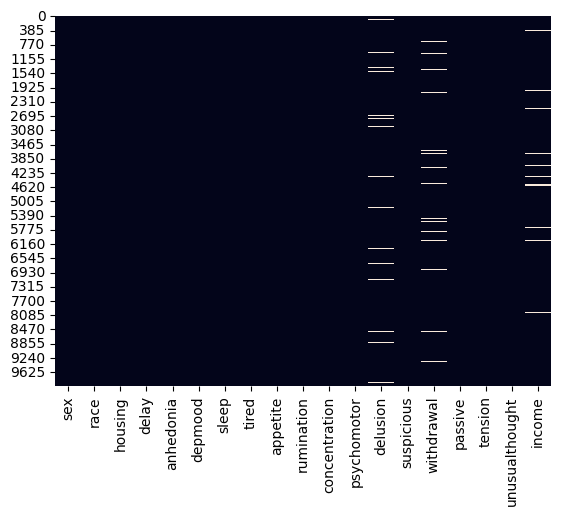

In [258]:
sns.heatmap(X_train.isnull(), cbar = False)

In [259]:
# 시각화를 위해 데이터 통합
train_data = pd.concat([X_train, y_train],axis=1)

In [260]:
train_data

,sex,race,housing,delay,anhedonia,depmood,sleep,tired,appetite,rumination,concentration,psychomotor,delusion,suspicious,withdrawal,passive,tension,unusualthought,income,diagnosis
0,Male,Asian,Stable,No,5.776834,7.945197,6.538275,5.821416,5.589637,5.990781,5.843773,3.682413,3.544660,1.396333,4.292102,5.820395,6.763654,1.165049,8.730176,1
1,Male,Hispanic,Stable,No,7.298161,8.605159,5.386226,6.657438,6.115384,4.740278,6.033697,5.381531,2.077573,2.520095,2.950640,4.904143,3.009537,1.635291,4.675389,0
2,Female,Black,Unstable,No,5.478631,6.581001,7.314665,5.759076,4.096647,4.004291,7.184592,5.588698,3.076944,1.552275,5.364331,5.332242,6.689860,3.030685,0.750534,1
3,Female,Black,Stable,Yes,7.440324,6.482757,7.519543,5.483178,5.532212,7.980671,6.172174,6.222733,3.657648,2.413774,NaN,3.874793,6.749632,1.548987,4.812903,0
4,Male,White,Stable,Yes,7.655051,6.159573,7.658879,5.310127,5.067152,3.445936,8.724369,4.631259,3.452163,4.862946,3.967482,3.537156,6.034795,3.502844,8.012474,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,White,Stable,No,6.984760,7.747922,5.918948,5.199608,6.144143,8.572927,7.748924,6.794376,3.604946,1.618179,4.632760,4.258271,2.705514,1.662325,6.886743,0
9996,Female,Black,Stable,Yes,9.595629,5.654628,7.105564,5.377792,5.635586,6.736875,6.227580,3.595448,2.537695,3.271867,3.744247,4.060284,6.332368,2.230673,7.207596,0
9997,Female,White,Stable,No,5.930835,7.880389,6.945941,4.418110,4.576188,8.106244,7.725471,4.954393,2.297858,2.109666,3.051387,4.378981,1.910506,1.773693,7.304441,0
9998,Female,White,Unstable,Yes,4.670724,7.904960,7.421954,5.546172,4.482417,4.341298,8.376867,5.023286,2.560603,2.930681,3.099049,5.390405,6.117305,2.980778,2.569829,1


Text(0.5, 1.0, 'Diagnosis ratio')

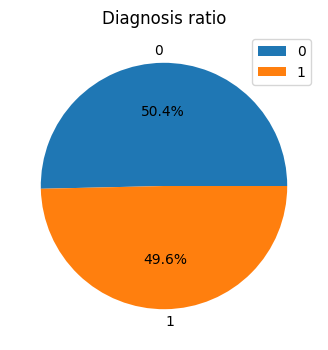

In [261]:
#조현병 진단률이 더 높음을 확인
diagnosis_ratio= train_data['diagnosis'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(diagnosis_ratio, labels=['0', '1'],  autopct='%.1f%%')
plt.legend()
plt.title('Diagnosis ratio')

Text(0, 0.5, 'income')

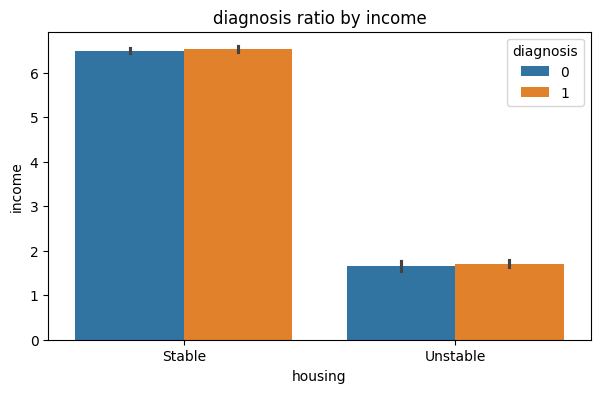

In [262]:
# income 과 housing에 따른 진단률은 비슷해서 하나만 써도 무방?
plt.figure(figsize = (7, 4))
sns.barplot(train_data, x = 'housing', y = 'income', hue = 'diagnosis')
plt.title('diagnosis ratio by income')
plt.xlabel('housing')
plt.ylabel('income')

Text(0, 0.5, 'diagnosis')

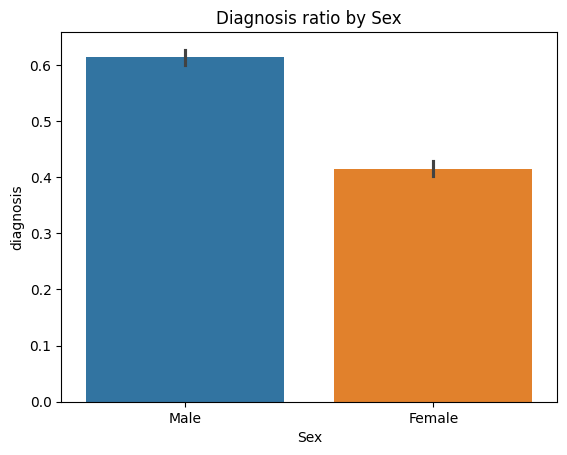

In [263]:
#남성의 비율이 더 높음
sns.barplot(train_data, x = 'sex', y = 'diagnosis', hue = 'sex')
plt.title('Diagnosis ratio by Sex')
plt.xlabel('Sex')
plt.ylabel('diagnosis')

Text(0.5, 1.0, 'Diagnosis ratio by sex')

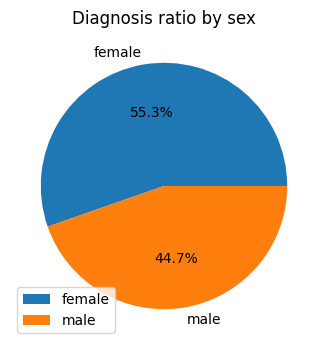

In [264]:
#성별에 따른 진단률
diagnosis_ratio = train_data["sex"].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(diagnosis_ratio, labels=['female', 'male'],  autopct='%.1f%%')
plt.legend()
plt.title('Diagnosis ratio by sex')

Text(0, 0.5, 'diagnosis')

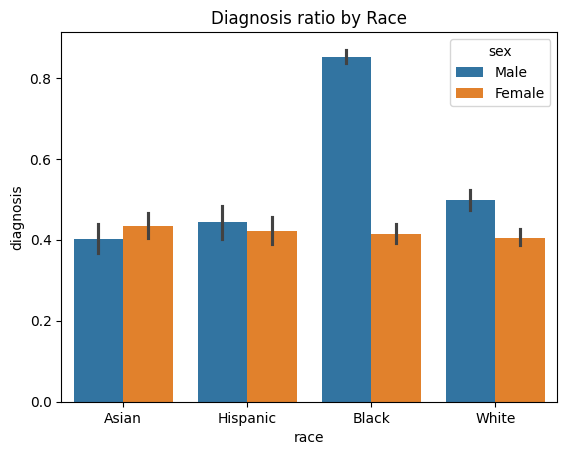

In [265]:
# 인종별 진단률 (흑인 남성이 가장 높음)
sns.barplot(train_data, x = 'race', y = 'diagnosis', hue = 'sex')
plt.title('Diagnosis ratio by Race')
plt.xlabel('race')
plt.ylabel('diagnosis')

Text(0, 0.5, 'Delusion')

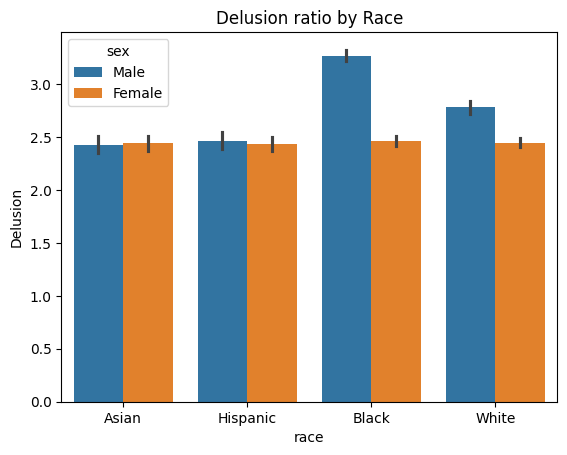

In [266]:
# race 와 delusion 비율 (흑인 남성의 delusion 비율이 가장 높음)
sns.barplot(train_data, x = 'race', y = 'delusion', hue = 'sex')
plt.title('Delusion ratio by Race')
plt.xlabel('race')
plt.ylabel('Delusion')

Text(0, 0.5, 'Rumination')

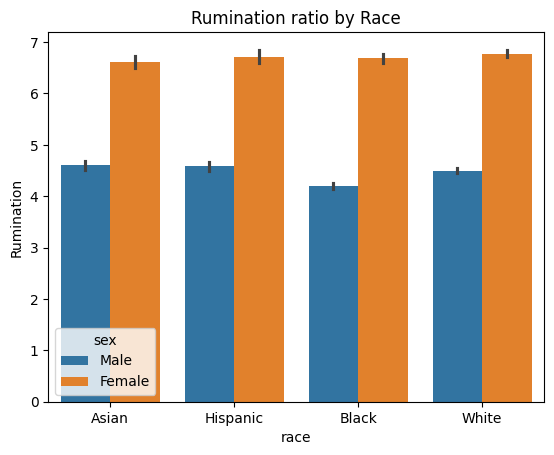

In [267]:
# race 와 rumination 상관관계 (다 비슷)
sns.barplot(train_data, x = 'race', y = 'rumination', hue = 'sex')
plt.title('Rumination ratio by Race')
plt.xlabel('race')
plt.ylabel('Rumination')

Text(0, 0.5, 'diagnosis')

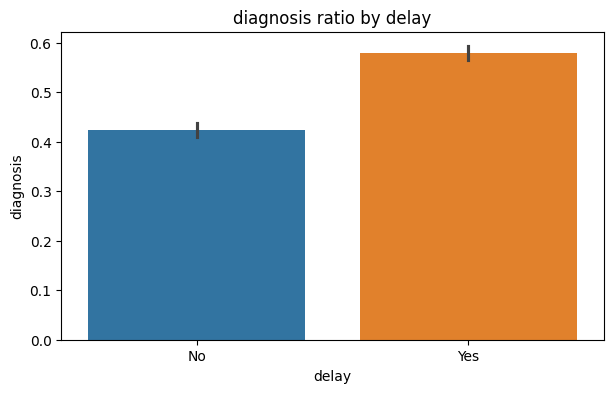

In [268]:
plt.figure(figsize = (7, 4))
sns.barplot(train_data, x = 'delay', y = 'diagnosis', hue = 'delay')
plt.title('diagnosis ratio by delay')
plt.xlabel('delay')
plt.ylabel('diagnosis')

Text(0, 0.5, 'tension')

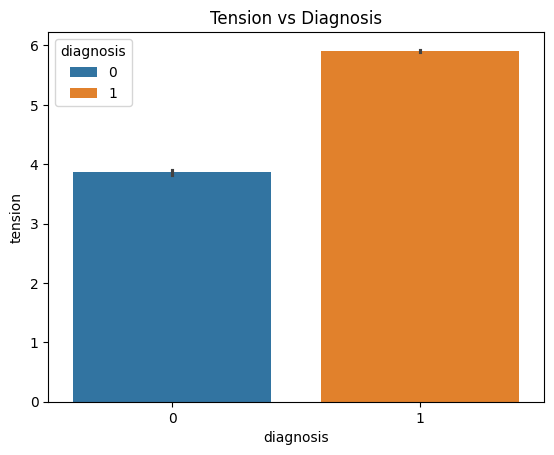

In [269]:
# tension 높을수록 진단률이 높다
sns.barplot(train_data, x = "diagnosis", y = "tension", hue="diagnosis")
plt.title('Tension vs Diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('tension')

Text(0, 0.5, 'anhedonia')

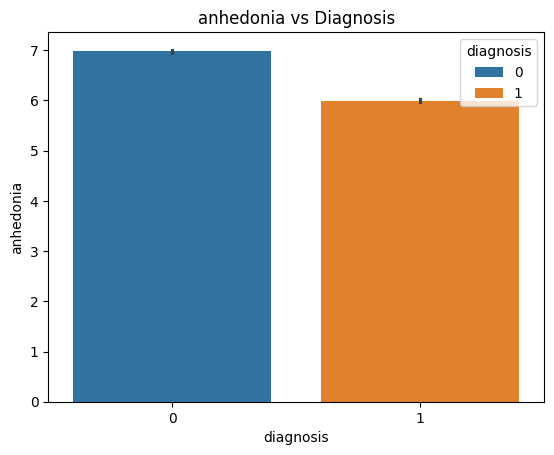

In [270]:
sns.barplot(train_data, x = "diagnosis", y = "anhedonia",hue="diagnosis")
plt.title('anhedonia vs Diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('anhedonia')

Text(0, 0.5, 'tired')

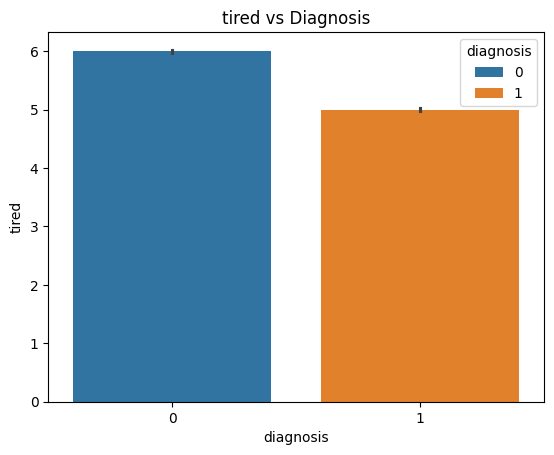

In [271]:
sns.barplot(train_data, x = "diagnosis", y = "tired",hue="diagnosis")
plt.title('tired vs Diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('tired')

Text(0, 0.5, 'sleep')

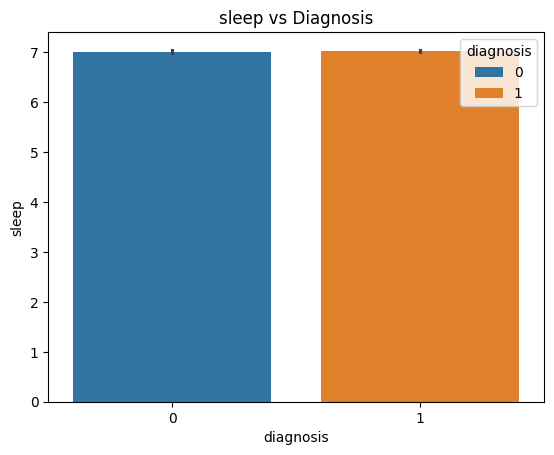

In [272]:
sns.barplot(train_data, x = "diagnosis", y = "sleep",hue="diagnosis")
plt.title('sleep vs Diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('sleep')

Text(0, 0.5, 'passive')

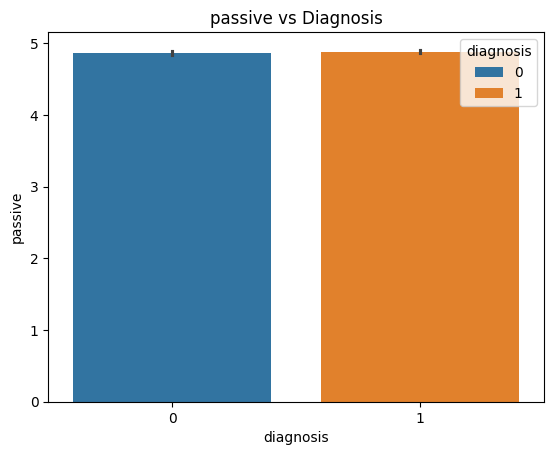

In [273]:
sns.barplot(train_data, x = "diagnosis", y = "passive",hue="diagnosis")
plt.title('passive vs Diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('passive')

Text(0, 0.5, 'concentration')

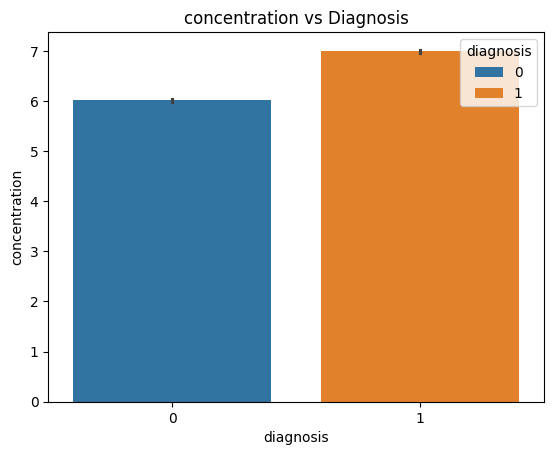

In [274]:
sns.barplot(train_data, x = "diagnosis", y = "concentration",hue="diagnosis")
plt.title('concentration vs Diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('concentration')

Text(0, 0.5, 'appetite')

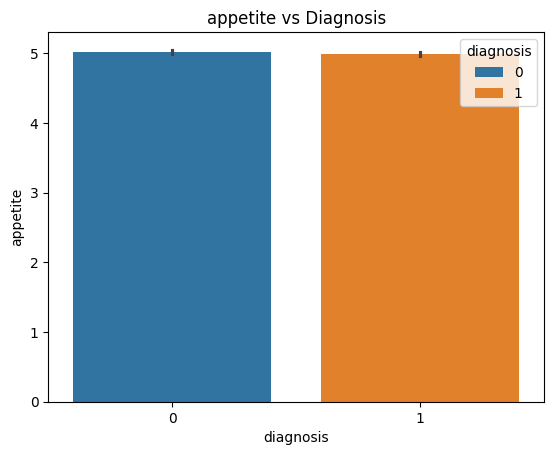

In [275]:
sns.barplot(train_data, x = "diagnosis", y = "appetite",hue="diagnosis")
plt.title('appetite vs Diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('appetite')

Text(0, 0.5, 'withdrawal')

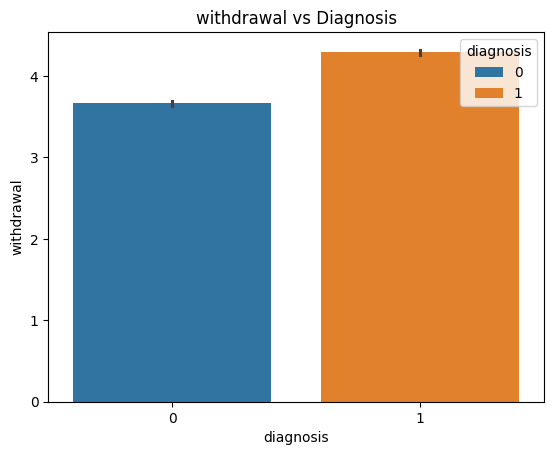

In [276]:
sns.barplot(train_data, x = "diagnosis", y = "withdrawal",hue="diagnosis")
plt.title('withdrawal vs Diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('withdrawal')

Text(0, 0.5, 'suspicious')

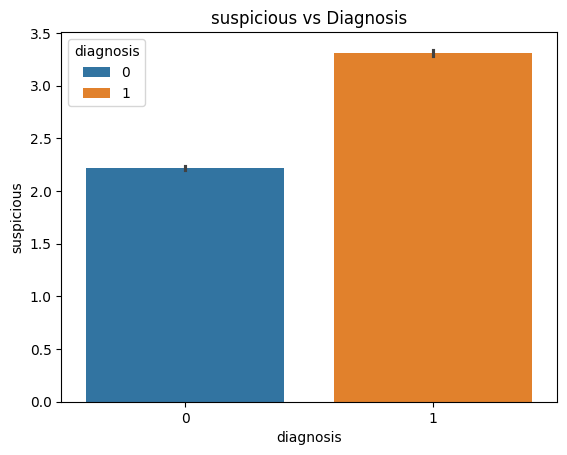

In [277]:
sns.barplot(train_data, x = "diagnosis", y = "suspicious",hue="diagnosis")
plt.title('suspicious vs Diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('suspicious')

Text(0, 0.5, 'psychomotor')

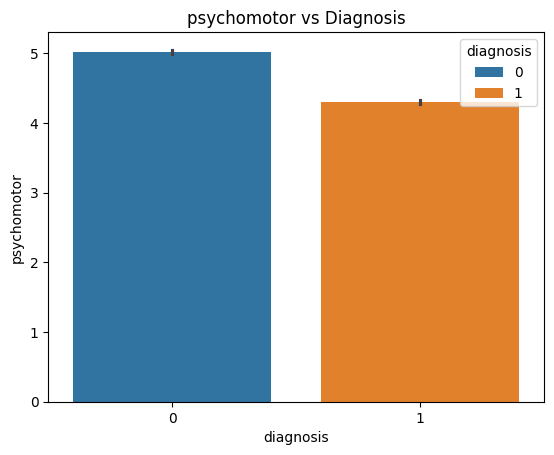

In [278]:
sns.barplot(train_data, x = "diagnosis", y = "psychomotor",hue="diagnosis")
plt.title('psychomotor vs Diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('psychomotor')

Text(0, 0.5, 'unusualthought')

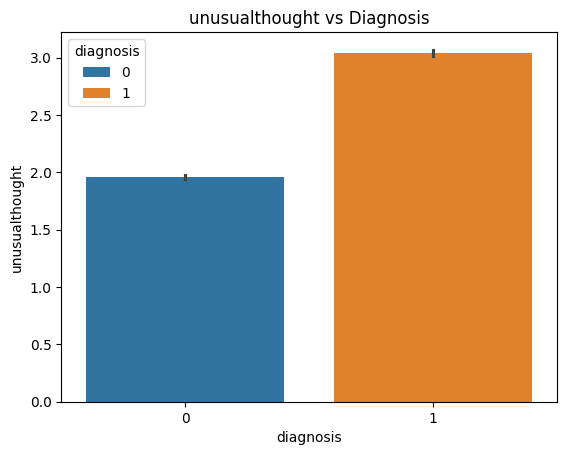

In [279]:
sns.barplot(train_data, x = "diagnosis", y = "unusualthought",hue="diagnosis")
plt.title('unusualthought vs Diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('unusualthought')

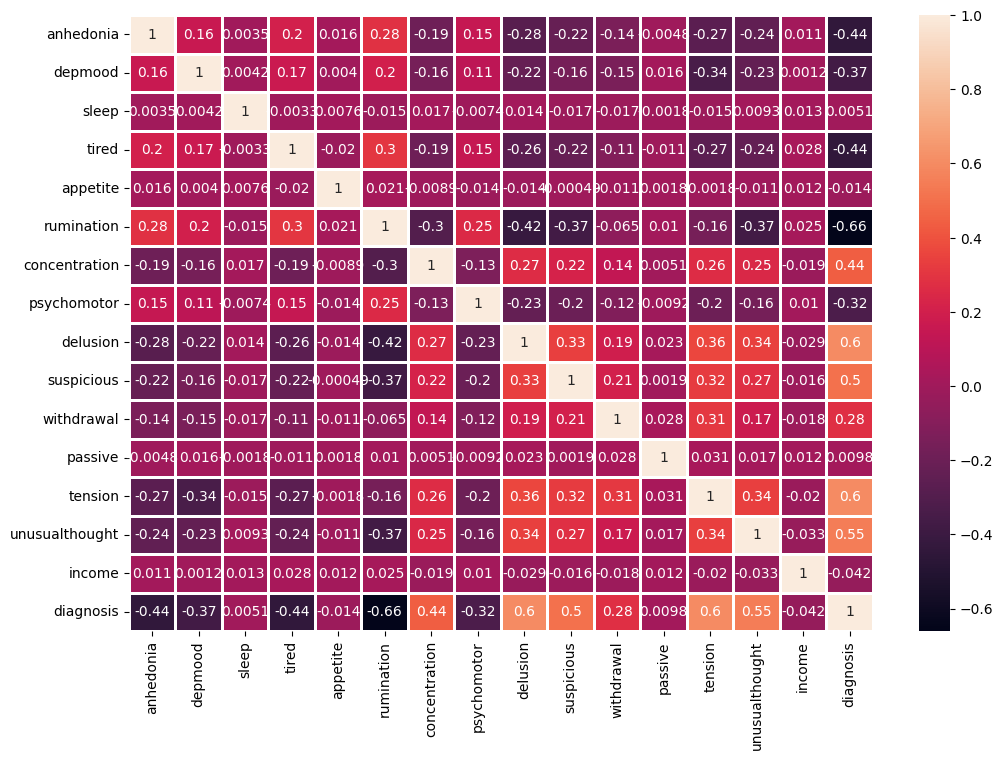

In [280]:
correlation_matrix = train_data.corr(numeric_only = True)

plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, linewidths = 1)
annot_kws={"size": 3}
plt.show()

##결측치

##X_train 전처리

In [281]:
# 결측치 확인 (delusion, income, withdrawal 에서 결측치 확)
train_df.isnull().sum()

Diagnosis           0
Sex                 0
Race                0
Housing             0
Delay               0
Anhedonia           0
DepMood             0
Sleep               0
Tired               0
Appetite            0
Rumination          0
Concentration       0
Psychomotor         0
Delusion          484
Suspicious          0
Withdrawal        539
Passive             0
Tension             0
UnusualThought      0
Income            201
dtype: int64

In [282]:
# 결측치 없음
test_df.isnull().sum()

sex               0
race              0
housing           0
delay             0
anhedonia         0
depmood           0
sleep             0
tired             0
appetite          0
rumination        0
concentration     0
psychomotor       0
delusion          0
suspicious        0
withdrawal        0
passive           0
tension           0
unusualthought    0
income            0
dtype: int64

In [283]:
# 결측치, 이상치 처리 전 데이터 복사
data = X_train.copy()

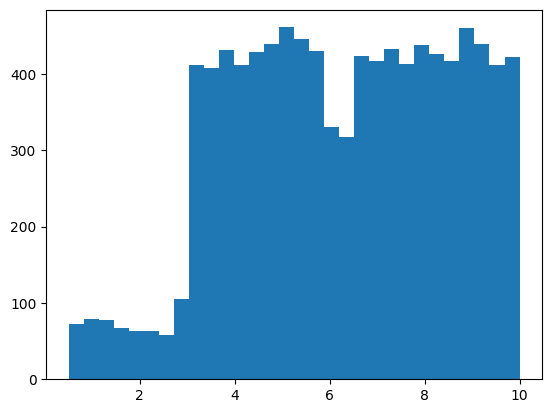

In [284]:
# income 결측치 처리 전
plt.hist(data.income, bins=30); plt.show()

In [285]:
data.income.fillna(data.income.mean(), inplace=True)
data.income.isnull().sum()

0

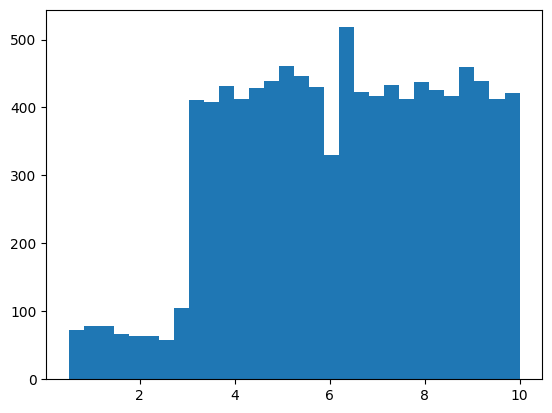

In [286]:
# 결측치 처리 후
plt.hist(data.income, bins=30); plt.show()

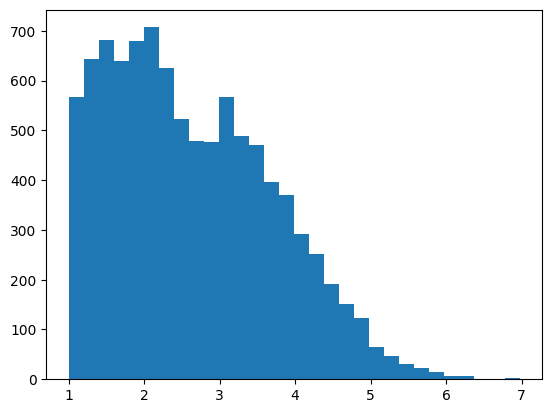

In [287]:
# delusion 결측치 처리 전
plt.hist(data.delusion, bins=30); plt.show()

In [288]:
data.delusion.fillna(data.delusion.mean(), inplace=True)
data.delusion.isnull().sum()

0

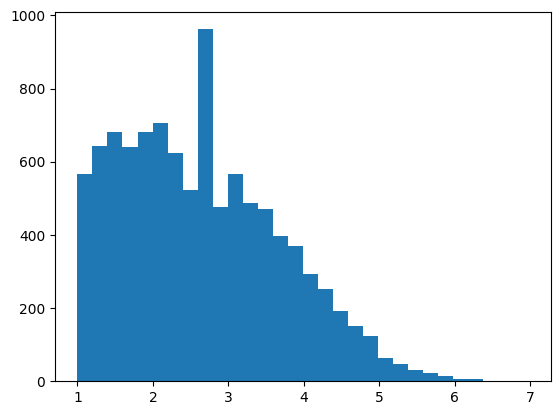

In [289]:
# delusion 결측치 처리 후
plt.hist(data.delusion, bins=30); plt.show()

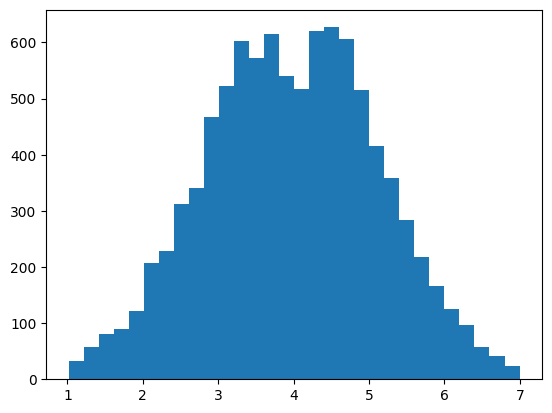

In [290]:
# withdrawal 결측치 처리 전
plt.hist(data.withdrawal, bins=30); plt.show()

In [291]:
data.withdrawal.fillna(data.withdrawal.mean(), inplace=True)
data.withdrawal.isnull().sum()

0

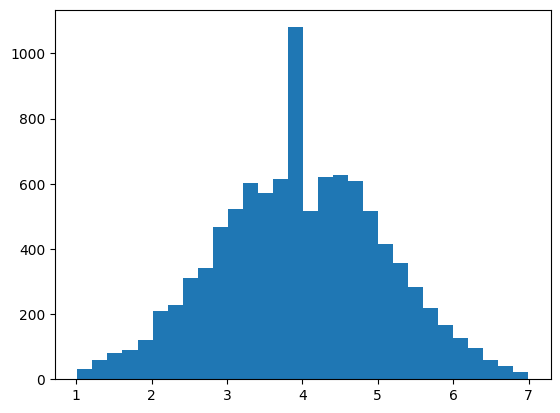

In [292]:
# withdrawal 결측치 처리 후
plt.hist(data.withdrawal, bins=30); plt.show()

In [293]:
# train data 결측치 처리 후
data.isnull().sum()

sex               0
race              0
housing           0
delay             0
anhedonia         0
depmood           0
sleep             0
tired             0
appetite          0
rumination        0
concentration     0
psychomotor       0
delusion          0
suspicious        0
withdrawal        0
passive           0
tension           0
unusualthought    0
income            0
dtype: int64

In [294]:
data_sex= pd.get_dummies(data["sex"], prefix="sex")
data_sex.head()

,sex_Female,sex_Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [295]:
data_housing= pd.get_dummies(data["housing"], prefix="housing")
data_housing.head()

,housing_Stable,housing_Unstable
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [296]:
data_delay = pd.get_dummies(data["delay"], prefix="delay")
data_delay.head()

,delay_No,delay_Yes
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [297]:
label_encoder = LabelEncoder()
data['race'] = label_encoder.fit_transform(data['race'])
data['race']

0       0
1       2
2       1
3       1
4       3
       ..
9995    3
9996    1
9997    3
9998    3
9999    1
Name: race, Length: 10000, dtype: int64

In [298]:
X = data[['race',  'anhedonia', 'depmood', 'sleep', 'tired', 'appetite', 'rumination', 'concentration',  'psychomotor', 'delusion', 'suspicious', 'withdrawal', 'passive', 'tension', 'unusualthought', 'income']]
X = pd.concat([X, data_sex, data_housing, data_delay], axis=1)
X[:10]

,race,anhedonia,depmood,sleep,tired,appetite,rumination,concentration,psychomotor,delusion,...,passive,tension,unusualthought,income,sex_Female,sex_Male,housing_Stable,housing_Unstable,delay_No,delay_Yes
0,0,5.776834,7.945197,6.538275,5.821416,5.589637,5.990781,5.843773,3.682413,3.544660,...,5.820395,6.763654,1.165049,8.730176,0,1,1,0,1,0
1,2,7.298161,8.605159,5.386226,6.657438,6.115384,4.740278,6.033697,5.381531,2.077573,...,4.904143,3.009537,1.635291,4.675389,0,1,1,0,1,0
2,1,5.478631,6.581001,7.314665,5.759076,4.096647,4.004291,7.184592,5.588698,3.076944,...,5.332242,6.689860,3.030685,0.750534,1,0,0,1,1,0
3,1,7.440324,6.482757,7.519543,5.483178,5.532212,7.980671,6.172174,6.222733,3.657648,...,3.874793,6.749632,1.548987,4.812903,1,0,1,0,0,1
4,3,7.655051,6.159573,7.658879,5.310127,5.067152,3.445936,8.724369,4.631259,3.452163,...,3.537156,6.034795,3.502844,8.012474,0,1,1,0,0,1
5,3,6.792071,7.356555,6.357645,5.632825,5.465320,4.558195,7.524505,5.409327,1.955426,...,4.101719,6.984951,2.663967,7.827365,0,1,1,0,1,0
6,0,6.041251,6.184474,6.312660,4.117508,4.662996,4.731070,5.547408,4.701880,2.644587,...,4.695503,6.034624,3.291693,9.874306,1,0,1,0,0,1
7,1,5.001452,7.278523,6.151661,6.016339,4.568768,4.988316,6.701939,4.652116,2.639820,...,3.010023,6.584751,4.304365,6.954237,0,1,1,0,0,1
8,3,7.163288,6.916091,6.758331,7.739223,5.880779,7.337959,6.278096,7.160140,1.136367,...,3.678778,3.823287,2.074402,3.736413,1,0,1,0,0,1
9,1,7.064150,8.652332,7.161443,6.515413,3.234756,5.247541,5.280656,5.175847,1.300076,...,4.814137,1.399222,1.587281,4.565128,0,1,1,0,1,0


##X_test 전처리

In [299]:
x_test.isnull().sum()

sex               0
race              0
housing           0
delay             0
anhedonia         0
depmood           0
sleep             0
tired             0
appetite          0
rumination        0
concentration     0
psychomotor       0
delusion          0
suspicious        0
withdrawal        0
passive           0
tension           0
unusualthought    0
income            0
dtype: int64

In [300]:
x_test_sex= pd.get_dummies(x_test["sex"], prefix="sex")
x_test_sex.head()

,sex_Female,sex_Male
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [301]:
x_test_housing= pd.get_dummies(x_test["housing"], prefix="housing")
x_test_housing.head()

,housing_Stable,housing_Unstable
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [302]:
x_test_delay= pd.get_dummies(x_test["delay"], prefix="delay")
x_test_delay.head()

,delay_No,delay_Yes
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [303]:
label_encoder = LabelEncoder()
x_test['race'] = label_encoder.fit_transform(x_test['race'])
x_test['race']

0      3
1      0
2      1
3      3
4      3
      ..
995    0
996    2
997    0
998    3
999    1
Name: race, Length: 1000, dtype: int64

In [304]:
x = x_test[['race',  'anhedonia', 'depmood', 'sleep', 'tired', 'appetite', 'rumination', 'concentration',  'psychomotor', 'delusion', 'suspicious', 'withdrawal', 'passive', 'tension', 'unusualthought', 'income']]
x = pd.concat([x,x_test_sex, x_test_housing, x_test_delay], axis=1)
x[:10]

,race,anhedonia,depmood,sleep,tired,appetite,rumination,concentration,psychomotor,delusion,...,passive,tension,unusualthought,income,sex_Female,sex_Male,housing_Stable,housing_Unstable,delay_No,delay_Yes
0,3,6.532957,6.662940,6.200509,5.082433,5.495875,2.933780,7.142030,4.734500,2.773761,...,4.852627,6.603999,1.194969,5.759510,0,1,1,0,0,1
1,0,4.696685,8.437778,7.473485,4.711261,4.480269,5.551996,7.102520,3.822138,2.001125,...,5.440405,6.080530,2.287655,8.618187,1,0,1,0,1,0
2,1,8.782816,7.908974,7.213374,4.356265,2.850050,7.061972,7.497020,4.967228,1.925978,...,5.101434,6.053067,1.163207,5.443189,1,0,1,0,0,1
3,3,5.511104,5.899826,7.479371,2.366412,7.130631,3.576740,5.655202,6.674195,4.342724,...,5.474838,6.499117,3.798262,6.868004,0,1,1,0,0,1
4,3,7.589003,9.643284,7.706466,5.501671,6.083194,9.205154,5.149195,3.996624,1.746914,...,4.712968,4.190474,2.840198,3.862500,1,0,1,0,0,1
5,0,8.129702,6.831754,7.119707,6.429770,5.916103,9.444007,7.168881,3.921316,1.838748,...,5.482381,4.804889,2.388966,8.880206,1,0,1,0,1,0
6,1,6.888539,7.953996,7.037855,8.111271,5.816638,7.435417,7.025069,6.137067,1.483715,...,5.388482,6.303048,1.887631,8.060842,1,0,1,0,0,1
7,3,5.183706,4.415731,6.954346,5.491344,5.771338,6.560503,6.163998,5.717910,4.072311,...,6.066230,6.943196,2.858323,7.009760,1,0,1,0,0,1
8,3,5.036884,6.768063,6.463561,4.447428,3.876846,5.958406,6.055801,4.641149,4.158471,...,4.986050,5.528723,3.105036,6.139755,1,0,1,0,1,0
9,3,7.025873,5.081405,8.646137,5.238717,4.365586,4.808718,7.696390,5.789505,2.167446,...,5.008002,3.575383,2.128868,9.413356,0,1,1,0,1,0


<Axes: >

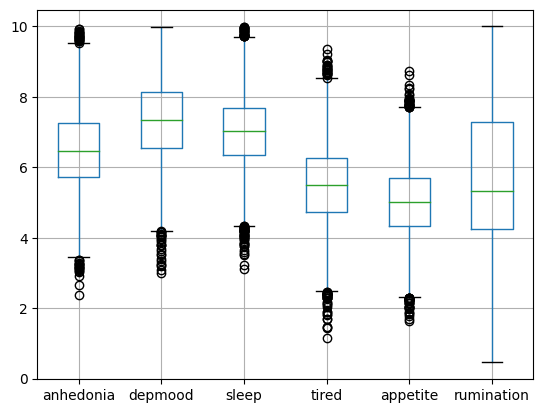

In [305]:
X.boxplot(column=['anhedonia', 'depmood', 'sleep', 'tired', 'appetite', 'rumination'])

<Axes: >

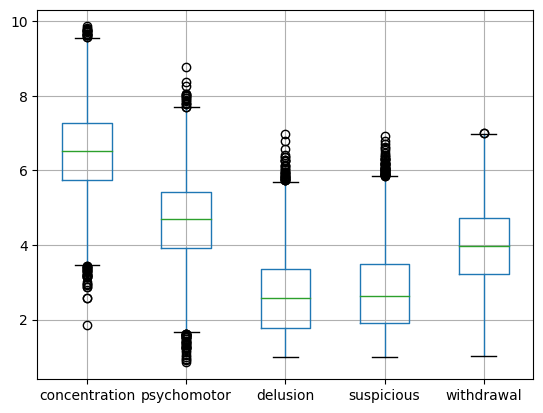

In [306]:
X.boxplot(column=['concentration',  'psychomotor', 'delusion', 'suspicious', 'withdrawal'])

<Axes: >

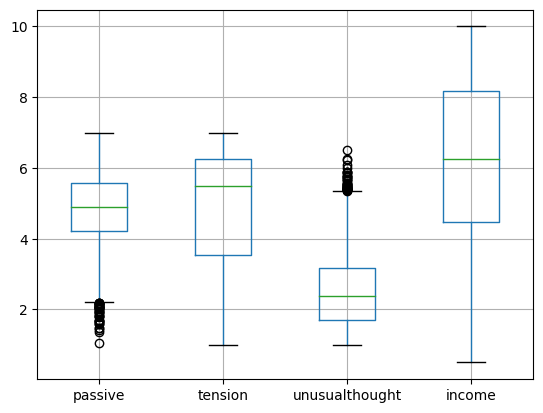

In [307]:
# 'passive', 'tension', 'unusualthought', 'income'
X.boxplot(column=['passive', 'tension', 'unusualthought', 'income'])

In [308]:
X1 = X.copy()
original_X = X1

Q3 = X1.quantile(0.75, numeric_only=True)
Q1 = X1.quantile(0.25, numeric_only=True)

IQR = Q3 - Q1
print(IQR)

race                2.000000
anhedonia           1.525657
depmood             1.582853
sleep               1.346067
tired               1.516156
appetite            1.350571
rumination          3.035577
concentration       1.524521
psychomotor         1.511624
delusion            1.572178
suspicious          1.568456
withdrawal          1.506784
passive             1.352299
tension             2.738657
unusualthought      1.456118
income              3.693204
sex_Female          1.000000
sex_Male            1.000000
housing_Stable      0.000000
housing_Unstable    0.000000
delay_No            1.000000
delay_Yes           1.000000
dtype: float64


In [309]:
outliers = (X1 < (Q1 - 1.5 * IQR)) | (X1 > (Q3 + 1.5 * IQR))
data_nonoutlier = X1[~(outliers.any(axis=1))]
data_outlier = X1[(outliers.any(axis=1))]
print(data_outlier)

      race  anhedonia   depmood     sleep     tired  appetite  rumination  \
2        1   5.478631  6.581001  7.314665  5.759076  4.096647    4.004291   
11       0   6.467646  8.950603  6.428311  4.544987  3.672958    3.662428   
37       3   9.829397  7.768593  6.292918  5.772597  6.239549    7.505446   
54       2   5.515376  7.884597  7.526080  8.203884  5.327873    2.290391   
72       1   5.551360  6.606752  7.399171  5.978441  5.248929    2.594810   
...    ...        ...       ...       ...       ...       ...         ...   
9986     1   6.623818  6.838601  7.109803  5.183666  3.141328    3.970799   
9992     3   7.113937  6.714972  8.591034  6.034893  4.478310    5.389105   
9994     1   7.134961  5.880584  6.766213  5.346153  4.081004    6.046994   
9996     1   9.595629  5.654628  7.105564  5.377792  5.635586    6.736875   
9998     3   4.670724  7.904960  7.421954  5.546172  4.482417    4.341298   

      concentration  psychomotor  delusion  ...   passive   tension  \
2   

## 스케일링

In [310]:
X_train = X
x_test = x

In [311]:
X_train

,race,anhedonia,depmood,sleep,tired,appetite,rumination,concentration,psychomotor,delusion,...,passive,tension,unusualthought,income,sex_Female,sex_Male,housing_Stable,housing_Unstable,delay_No,delay_Yes
0,0,5.776834,7.945197,6.538275,5.821416,5.589637,5.990781,5.843773,3.682413,3.544660,...,5.820395,6.763654,1.165049,8.730176,0,1,1,0,1,0
1,2,7.298161,8.605159,5.386226,6.657438,6.115384,4.740278,6.033697,5.381531,2.077573,...,4.904143,3.009537,1.635291,4.675389,0,1,1,0,1,0
2,1,5.478631,6.581001,7.314665,5.759076,4.096647,4.004291,7.184592,5.588698,3.076944,...,5.332242,6.689860,3.030685,0.750534,1,0,0,1,1,0
3,1,7.440324,6.482757,7.519543,5.483178,5.532212,7.980671,6.172174,6.222733,3.657648,...,3.874793,6.749632,1.548987,4.812903,1,0,1,0,0,1
4,3,7.655051,6.159573,7.658879,5.310127,5.067152,3.445936,8.724369,4.631259,3.452163,...,3.537156,6.034795,3.502844,8.012474,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,6.984760,7.747922,5.918948,5.199608,6.144143,8.572927,7.748924,6.794376,3.604946,...,4.258271,2.705514,1.662325,6.886743,1,0,1,0,1,0
9996,1,9.595629,5.654628,7.105564,5.377792,5.635586,6.736875,6.227580,3.595448,2.537695,...,4.060284,6.332368,2.230673,7.207596,1,0,1,0,0,1
9997,3,5.930835,7.880389,6.945941,4.418110,4.576188,8.106244,7.725471,4.954393,2.297858,...,4.378981,1.910506,1.773693,7.304441,1,0,1,0,1,0
9998,3,4.670724,7.904960,7.421954,5.546172,4.482417,4.341298,8.376867,5.023286,2.560603,...,5.390405,6.117305,2.980778,2.569829,1,0,0,1,0,1


In [312]:
x_test

,race,anhedonia,depmood,sleep,tired,appetite,rumination,concentration,psychomotor,delusion,...,passive,tension,unusualthought,income,sex_Female,sex_Male,housing_Stable,housing_Unstable,delay_No,delay_Yes
0,3,6.532957,6.662940,6.200509,5.082433,5.495875,2.933780,7.142030,4.734500,2.773761,...,4.852627,6.603999,1.194969,5.759510,0,1,1,0,0,1
1,0,4.696685,8.437778,7.473485,4.711261,4.480269,5.551996,7.102520,3.822138,2.001125,...,5.440405,6.080530,2.287655,8.618187,1,0,1,0,1,0
2,1,8.782816,7.908974,7.213374,4.356265,2.850050,7.061972,7.497020,4.967228,1.925978,...,5.101434,6.053067,1.163207,5.443189,1,0,1,0,0,1
3,3,5.511104,5.899826,7.479371,2.366412,7.130631,3.576740,5.655202,6.674195,4.342724,...,5.474838,6.499117,3.798262,6.868004,0,1,1,0,0,1
4,3,7.589003,9.643284,7.706466,5.501671,6.083194,9.205154,5.149195,3.996624,1.746914,...,4.712968,4.190474,2.840198,3.862500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,5.778451,8.589813,8.916565,5.266511,5.554438,6.274942,5.542696,7.181934,2.191643,...,3.773609,2.055486,2.043128,5.631816,0,1,1,0,1,0
996,2,5.432834,5.461578,7.754216,4.438643,6.184483,4.105046,8.591792,4.849451,2.900444,...,3.661916,6.025296,1.831928,9.611206,1,0,1,0,0,1
997,0,6.234666,9.785134,7.084432,5.555918,6.801709,5.887713,6.844879,3.948413,2.821026,...,5.123010,6.710481,2.120007,9.959415,1,0,1,0,1,0
998,3,8.179167,8.831478,7.012739,5.655057,4.590508,4.277342,4.439676,6.729120,2.835645,...,5.089454,2.070562,2.066130,5.067417,0,1,1,0,1,0


In [321]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

print(X_train)
print(x_test)

[[-1.54328236 -0.63716972  0.53312778 ... -0.23845128  1.02573093
  -1.02573093]
 [ 0.25531022  0.73137352  1.11423172 ... -0.23845128  1.02573093
  -1.02573093]
 [-0.64398607 -0.90542478 -0.66806261 ...  4.19372872  1.02573093
  -1.02573093]
 ...
 [ 1.1546065  -0.4986354   0.47606333 ... -0.23845128  1.02573093
  -1.02573093]
 [ 1.1546065  -1.63219559  0.49769807 ...  4.19372872 -0.97491454
   0.97491454]
 [-0.64398607 -1.86546136 -1.27446663 ... -0.23845128 -0.97491454
   0.97491454]]
[[ 1.1546065   0.04301697 -0.59591403 ... -0.23845128 -0.97491454
   0.97491454]
 [-1.54328236 -1.60884175  0.9668503  ... -0.23845128  1.02573093
  -1.02573093]
 [-0.64398607  2.06692715  0.50123295 ... -0.23845128 -0.97491454
   0.97491454]
 ...
 [-1.54328236 -0.22531721  2.15321287 ... -0.23845128  1.02573093
  -1.02573093]
 [ 1.1546065   1.52390168  1.31350825 ... -0.23845128  1.02573093
  -1.02573093]
 [-0.64398607  2.50074276 -1.20653589 ... -0.23845128 -0.97491454
   0.97491454]]


svm

In [318]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [319]:
svm = SVC(random_state = 42)
svm.fit(X_train, y_train)
y_train_pred_svm = svm.predict(X_train)
accuracy_svm = accuracy_score(y_train, y_train_pred_svm)

In [320]:
print(f'SVM_Accuracy: {accuracy_svm*100:.0f}%')

SVM_Accuracy: 99%
